<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/14_Soft_DWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Soft-DTW weighted barycenters

This example presents the weighted Soft-DTW time series barycenter method.

Soft-DTW [1] is a differentiable loss function for Dynamic Time Warping,
allowing for the use of gradient-based algorithms. The barycenter corresponds
to the time series that minimizes the sum of the distances between that time
series and all the time series from a dataset. It is thus an optimization
problem and having a differentiable loss function makes find the solution much
easier.

In this example, we consider four time series $X_0, X_1, X_2$ and
$X_3$ from four different classes in the Trace dataset. We compute
the barycenters for different sets of weights and plot them. The closer to a
time series the barycenter is, the higher the weight for this time series
is.

[1] M. Cuturi and M. Blondel, "Soft-DTW: a Differentiable Loss Function for
Time-Series". International Conference on Machine Learning, 2017.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 3.9 MB/s 


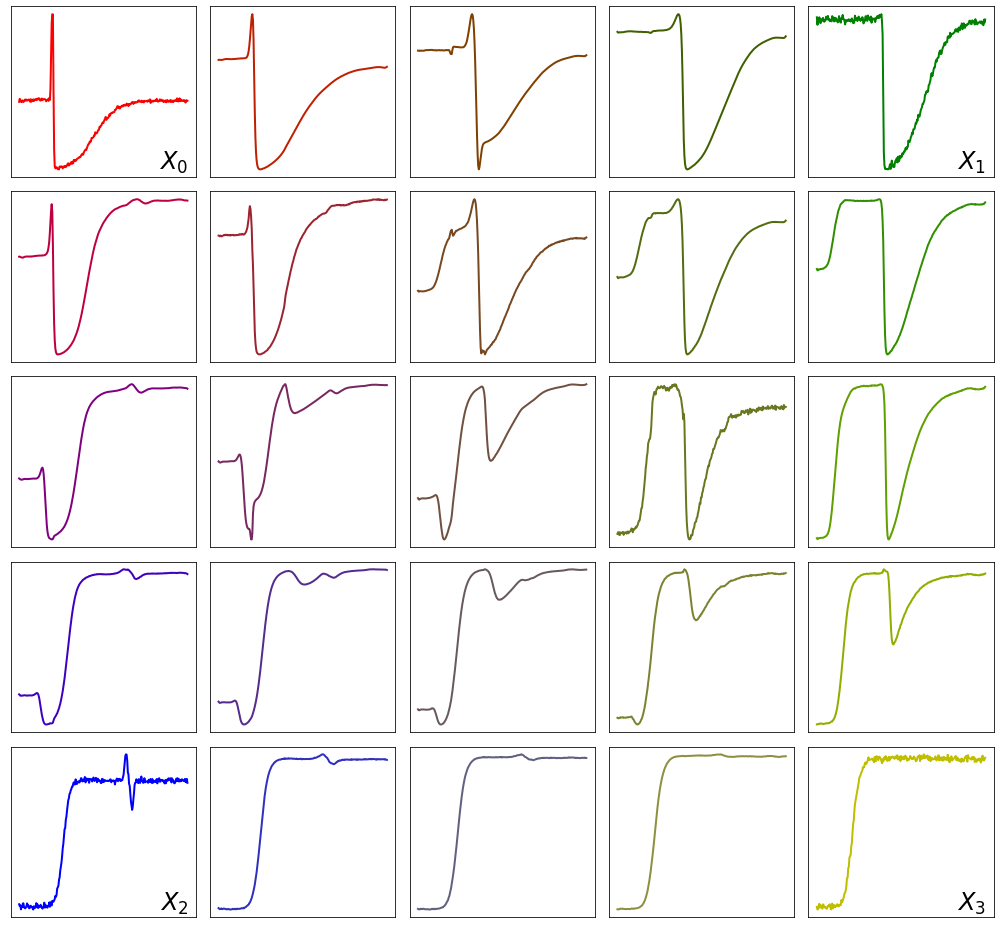

In [5]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt
import matplotlib.colors

from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.barycenters import softdtw_barycenter
from tslearn.datasets import CachedDatasets


def row_col(position, n_cols=5):
    idx_row = (position - 1) // n_cols
    idx_col = position - n_cols * idx_row - 1
    return idx_row, idx_col


def get_color(weights):
    baselines = numpy.zeros((4, 3))
    weights = numpy.array(weights).reshape(1, 4)
    for i, c in enumerate(["r", "g", "b", "y"]):
        baselines[i] = matplotlib.colors.ColorConverter().to_rgb(c)
    return numpy.dot(weights, baselines).ravel()


numpy.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_out = numpy.empty((4, X_train.shape[1], X_train.shape[2]))

plt.figure(figsize=(14, 13))
for i in range(4):
    X_out[i] = X_train[y_train == (i + 1)][0]
X_out = TimeSeriesScalerMinMax().fit_transform(X_out)

for i, pos in enumerate([1, 5, 21, 25]):
    plt.subplot(5, 5, pos)
    w = [0.] * 4
    w[i] = 1.
    plt.plot(X_out[i].ravel(),
             color=matplotlib.colors.rgb2hex(get_color(w)),
             linewidth=2)
    plt.text(X_out[i].shape[0], 0., "$X_%d$" % i,
             horizontalalignment="right",
             verticalalignment="baseline",
             fontsize=24)
    plt.xticks([])
    plt.yticks([])

for pos in range(2, 25):
    if pos in [1, 5, 21, 25]:
        continue
    plt.subplot(5, 5, pos)
    idxr, idxc = row_col(pos, 5)
    w = numpy.array([0.] * 4)
    w[0] = (4 - idxr) * (4 - idxc) / 16
    w[1] = (4 - idxr) * idxc / 16
    w[2] = idxr * (4 - idxc) / 16
    w[3] = idxr * idxc / 16
    plt.plot(softdtw_barycenter(X=X_out, weights=w).ravel(),
             color=matplotlib.colors.rgb2hex(get_color(w)),
             linewidth=2)
    plt.xticks([])
    plt.yticks([])


plt.tight_layout()
plt.show()